In [64]:
# problem imports
from ne.benchmark.mop1 import MOP1
from ne.benchmark.saddle import Saddle

# alg imports
from ne.nash_eq_algs.bayes_ne import BayesNE
from ne.nash_eq_algs.gpgame import GPGame
from ne.nash_eq_algs.stoch_search_methods import iterated_best_response, hier_sa

# util imports
from ne.utils.plots import plot_decision_space, plot_regret_trace

# filter numerical convergence warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
np.random.seed(1)

#### Problem 1: SADDLE

In [65]:
dim = 2
x_opt = 0.5
is_noise = False
problem = Saddle(is_minimize=False, is_noise=is_noise, dim=dim, x_opt=x_opt)

###### BN-Exact

In [66]:
bn_exact = BayesNE(problem.evaluate, [dim // 2, dim // 2], is_approx=False, epsilon=0.15)

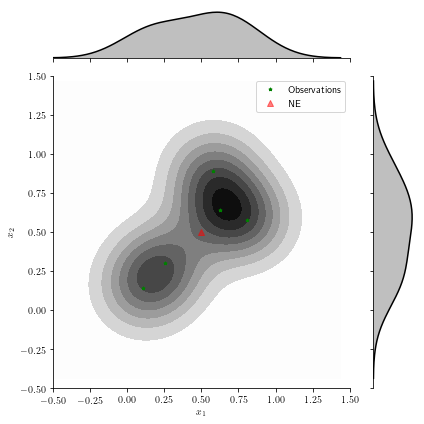

In [67]:
# show the initial design
plot_decision_space(bn_exact.pts, actual_ne=problem.get_x_ne(), title=None)

In [68]:
# Search
bn_exact.run()

WARNING (module=cma.utilities.utils, iteration=4):  flat fitness (sigma=2.44e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=4):  flat fitness (sigma=2.44e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=4):  flat fitness (sigma=2.44e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=2):  flat fitness (sigma=2.72e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to co

iter 10 - x: [0.50422234 0.5346613 ], f(x): [0.001183577532419222, -0.001183577532419222]
log-marginal likelihood for 0's payoff: 40.2805605086
log-marginal likelihood for 1's payoff: 40.2805605088
iter 11 - x: [0.50461429 0.53437918], f(x): [0.001160636120939254, -0.001160636120939254]
log-marginal likelihood for 0's payoff: 45.9137661524
log-marginal likelihood for 1's payoff: 45.9137661524
iter 12 - x: [1.0000000e+00 1.7185435e-09], f(x): [-1.2959933126666101e-09, 1.2959933126666101e-09]
log-marginal likelihood for 0's payoff: 46.8791704133
log-marginal likelihood for 1's payoff: 46.8791704133
iter 13 - x: [0.50367962 0.48800631], f(x): [0.00013030895669339276, -0.00013030895669339276]
log-marginal likelihood for 0's payoff: 52.4919854829
log-marginal likelihood for 1's payoff: 52.4919854829
iter 14 - x: [3.1259292e-10 1.0000000e+00], f(x): [3.064069553637694e-10, -3.064069553637694e-10]
log-marginal likelihood for 0's payoff: 53.1081390189
log-marginal likelihood for 1's payoff: 53

In [69]:
# regression erros on the sampled points
bn_exact.errs

[array([0.08688871]),
 array([0.24997184]),
 array([0.08590822]),
 array([0.00178107]),
 array([0.00223055]),
 array([0.16226382]),
 array([0.00214933]),
 array([0.0022168]),
 array([0.11774555]),
 array([9.72830871e-05]),
 array([1.1207072e-05]),
 array([5.32840697e-06]),
 array([0.01110169]),
 array([0.00062932]),
 array([0.022576])]

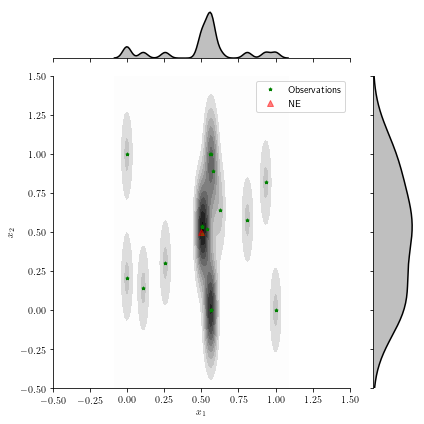

In [70]:
# show the posteriorq
plot_decision_space(problem.get_xs(), actual_ne=problem.get_x_ne(), title=None)

{'dim': 2, 'actual_fevals': 20, 'run': 1, 'alg': 'BN-exact', 'regret_trace': [0.019990994737837862, 0.019990994737837862, 0.019990994737837862, 0.019990994737837862, 0.019990994737837862, 0.019990994737837862, 0.019990994737837862, 0.019990994737837862, 0.019990994737837862, 0.019990994737837862, 0.019990994737837862, 0.019990994737837862, 0.019990994737837862, 0.0015231051733517289, 0.0013160902617022617, 0.0012012780841900769, 0.0011810359997643306, 0.0011810359997643306, 0.00011630263015516913, 0.00011630263015516913], 'fevals': 20}


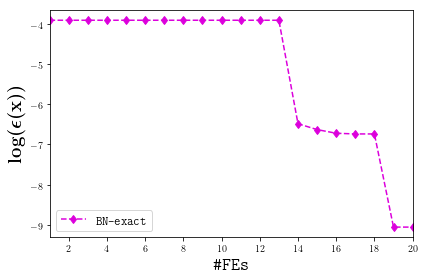

In [71]:
# compute regret trace
run = 1
alg_variant = 'BN-exact'
actual_fevals = problem.get_num_evals()
fevals = actual_fevals
best_regret = np.inf
regret_trace = []
for xs in bn_exact.pts[:fevals]:
    best_regret = min(best_regret, problem.ne_regret(xs))
    regret_trace.append(best_regret)


stats = {
    'fevals': fevals,
    'run': run,
    'alg': alg_variant,
    'dim': dim,
    'actual_fevals': actual_fevals,
    'regret_trace': regret_trace
}
print(stats)
plot_regret_trace([stats], is_file=False)

In [72]:
# get a suggested NE (experimental): 
best_ne_br = bn_exact.suggest_approx_ne(best_crit='br')
best_ne_abr =  bn_exact.suggest_approx_ne(best_crit='abr')
best_ne_std = bn_exact.suggest_approx_ne(best_crit='std')

In [73]:
pts = [best_ne_br, best_ne_abr, best_ne_std]
names = ['br', 'abr', 'std']
print("NE: {}, Approx Regret: {}".format(
    problem.get_x_ne(), 
    bn_exact.approx_max_regret(problem.get_x_ne())
    ))
print("After {} function evaluations".format(problem.get_num_evals()))

for pt, name in zip(pts, names):
    print("=" * 20)
    print("{}-best pt: {}, Actual regret: {}".format(name, pt, problem.ne_regret(pt)))
    print("{}-best pt: {}, Approx regret: {}".format(name, pt, bn_exact.approx_max_regret(pt)))
    print("player 1 - {}-best pt regret: {}, NE regret : {}".format(
        name,
        bn_exact.approx_regret(pt, 0),
        bn_exact.approx_regret(problem.get_x_ne(), 0)
    ))
    print("player 2 - {}-best pt regret: {}, NE regret : {}".format(
        name,
        bn_exact.approx_regret(pt, 1),
        bn_exact.approx_regret(problem.get_x_ne(), 1)
    ))
# This clears sampled (queried) points which comes handy when we would like
# to sample points sampled by the algorithm or by the `problem.ne_regret` method
_ = problem.get_xs()

NE: [0.5 0.5], Approx Regret: 1.29263939257
After 2280 function evaluations
br-best pt: [0.50367962 0.48800631], Actual regret: 0.000143017229507
br-best pt: [0.50367962 0.48800631], Approx regret: -24.1837216521
player 1 - br-best pt regret: -24.554434323, NE regret : 1.29263939257
player 2 - br-best pt regret: -24.1837216521, NE regret : 1.29260510324
abr-best pt: [0.50367962 0.48800631], Actual regret: 0.000143738648922
abr-best pt: [0.50367962 0.48800631], Approx regret: -24.1837216521
player 1 - abr-best pt regret: -24.554434323, NE regret : 1.29263939257
player 2 - abr-best pt regret: -24.1837216521, NE regret : 1.29260510324
std-best pt: [0.53925482 0.52003956], Actual regret: 0.00153708463977
std-best pt: [0.53925482 0.52003956], Approx regret: -24.092325261
player 1 - std-best pt regret: -24.092325261, NE regret : 1.29263939257
player 2 - std-best pt regret: -24.2093012117, NE regret : 1.29260510324


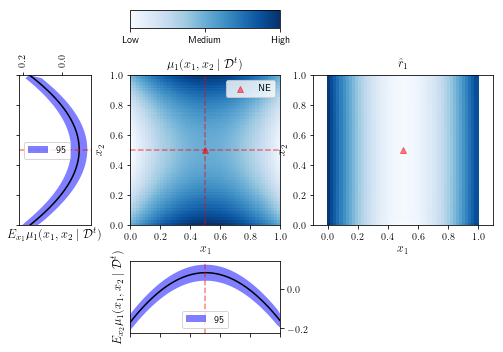

In [74]:
# view the current belief for player 1
bn_exact.plot_player_posterior(p=0, actual_ne=problem.get_x_ne(), title=None)

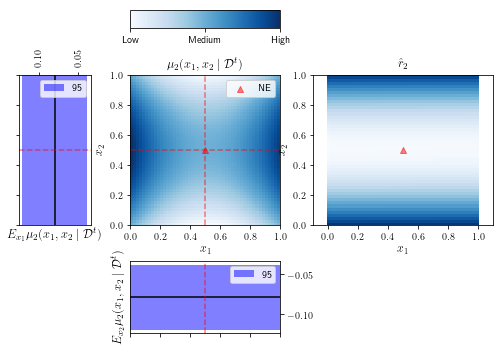

In [75]:
# view the current belief for player 2
bn_exact.plot_player_posterior(p=1, actual_ne=problem.get_x_ne(), title=None)

##### BN-Approx

WARNING (module=cma.utilities.utils, iteration=1):  flat fitness (sigma=2.66e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=1):  flat fitness (sigma=2.66e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=1):  flat fitness (sigma=2.66e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (module=cma.utilities.utils, iteration=1):  flat fitness (sigma=1.87e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to co

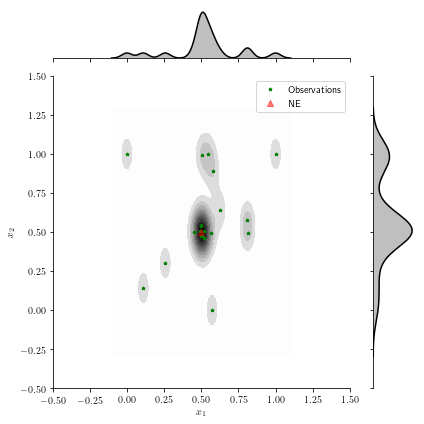

In [76]:
bn_approx = BayesNE(problem.evaluate, [dim // 2, dim // 2], is_approx=True)
# Search
bn_approx.run()
# show the posteriorq
plot_decision_space(problem.get_xs(), actual_ne=problem.get_x_ne(), title=None)

In [77]:
# The following algorithms assume minimizing the objective functions
problem = Saddle(is_minimize=True, is_noise=is_noise, dim=dim, x_opt=x_opt)

##### GPGame

GPGame {'_crit': 'psim', '_max_iters': 20, '_n_init': 20, '_grid': 31, '_seed': 1, '_var_assignment': [1, 2], '_nobj': 2, 'r_fcn_str': '\n                function()\n                {\n                    require(GPGame)\n                    # Grid definition: player 1 plays x1...xj, player 2 xj+1...xn\n                    # The grid is a lattice made of two designs of different sizes\n                    n.s <- c(31, 31)\n                    x.to.obj <- c(1, 2)\n                    integcontrol <- list(n.s=n.s, gridtype=\'lhs\')\n                    # Set filtercontrol: window filter applied for integration and candidate points\n                    filtercontrol <- list(nsimPoints=800, ncandPoints=200,\n                    filter=c("window", "window"))\n                    # Set km control: lower bound is specified for the covariance range\n                    # Covariance type and model trend are specified\n                    kmcontrol <- list(lb=rep(.2,4), model.trend=~1, covtype="

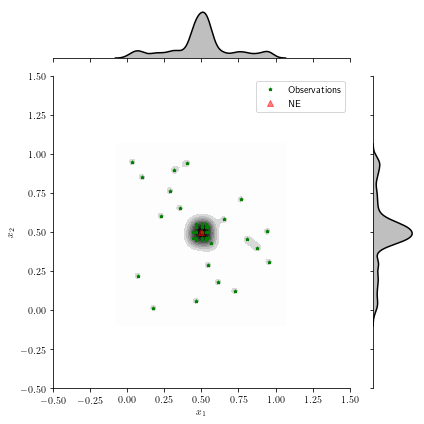

In [78]:
gpg = GPGame(fct=problem.evaluate, var_assignment=[1,2], nobj=2)
_, pt, _ = gpg.run()
plot_decision_space(problem.get_xs(), actual_ne=problem.get_x_ne(), title=None)

In [79]:
pt = [0.5017106571580253, 0.5017106571580253] # from Out[16]
print("GPG-best pt: {}, Actual regret: {}".format(pt, problem.ne_regret(pt)))
# clear sampled points
_ = problem.get_xs()

GPG-best pt: [0.5017106571580253, 0.5017106571580253], Actual regret: 1.00004831324e-06


##### StochSearch

x's gain:0.00688534770358, y's gain:0.0485428824105
x's gain:0.00688534770358, y's gain:0.0485428824105
x's gain:0.00688534770358, y's gain:0.0485428824105
x's gain:0.00688534770358, y's gain:0.0485428824105
x's gain:0.00688534770358, y's gain:0.0485428824105


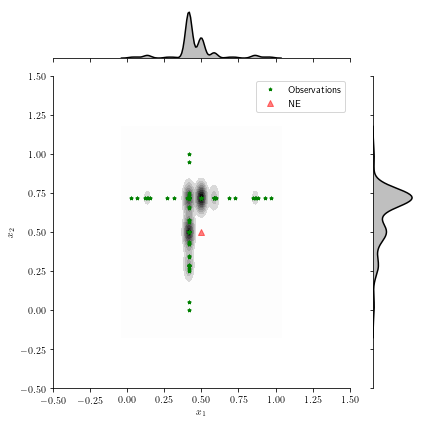

Iterated BR-best pt: [0.5 0.5], Actual regret: -4.01600188463e-10


In [80]:
# Iterated Best respone
pt = iterated_best_response(problem.evaluate, n_xs=[1, 1], max_fevals=500)
plot_decision_space(problem.get_xs(), actual_ne=problem.get_x_ne(), title=None)
print("Iterated BR-best pt: {}, Actual regret: {}".format(pt, problem.ne_regret(pt)))

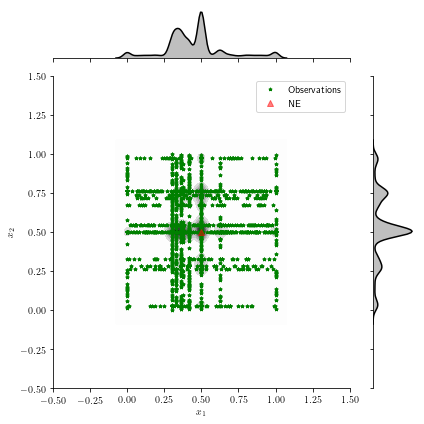

Hier SA-best pt: [0.5        0.54412086], Actual regret: 0.00194572347623


In [81]:
# Hierarchical SA
pt = hier_sa(problem.evaluate, n_xs=[1, 1], max_fevals=100)
plot_decision_space(problem.get_xs(), actual_ne=problem.get_x_ne(), title=None)
print("Hier SA-best pt: {}, Actual regret: {}".format(pt, problem.ne_regret(pt)))

#### Problem 2: MOP

In [82]:
problem = MOP1(is_minimize=False, is_noise=False)
# note: since the  MOP's domain is not [0,1]^D, and the fact that BayesNE operates in [0,1]^D.
# we set the flag is_unit in the `problem.ne_regret` when computing the regret of a point in [0,1]^D

In [83]:
bn_approx = BayesNE(problem.evaluate, [1, 1], is_approx=True, max_fevals=40, epsilon=0.05)

iter 0 - x: [0.0173737  0.99900931], f(x): [-12.389609613252205, 14.972993258903113]
log-marginal likelihood for 0's payoff: -56.5034729262
log-marginal likelihood for 1's payoff: -28.9559269993
iter 1 - x: [0.85689277 0.99996263], f(x): [-193.09221186123108, 23.773475795366267]
log-marginal likelihood for 0's payoff: -68.0621584757
log-marginal likelihood for 1's payoff: -31.8293025872
iter 2 - x: [3.51241888e-04 9.98206978e-01], f(x): [-17.511103572764075, 12.531017813057325]
log-marginal likelihood for 0's payoff: -70.3930983756
log-marginal likelihood for 1's payoff: -32.7598375638
iter 3 - x: [8.58607719e-04 9.91323129e-01], f(x): [-17.80516529444278, 12.53594846951931]
log-marginal likelihood for 0's payoff: -75.156132722
log-marginal likelihood for 1's payoff: -34.420600569
iter 4 - x: [0.00689091 0.99958574], f(x): [-15.357461253282805, 13.548097679205604]
log-marginal likelihood for 0's payoff: -78.6869220694
log-marginal likelihood for 1's payoff: -33.6195888875
iter 5 - x: [

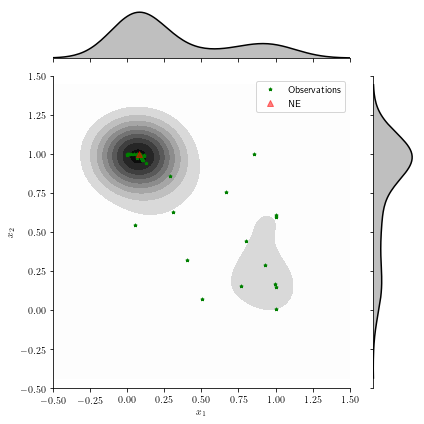

In [84]:
# Search
bn_approx.run()
# show the posteriorq
plot_decision_space(problem.get_xs(), actual_ne=problem.get_x_ne(), title=None)

{'dim': 2, 'actual_fevals': 40, 'run': 1, 'alg': 'BN-approx', 'regret_trace': [49.88075735110956, 22.60481679289943, 3.716235007673159, 3.716235007673159, 3.716235007673159, 2.6641426274733058, 2.6641426274733058, 2.6641426274733058, 2.6641426274733058, 2.6641426274733058, 2.6641426274733058, 2.6641426274733058, 2.6641426274733058, 2.6641426274733058, 2.6641426274733058, 2.6641426274733058, 0.041302172884275734, 0.041302172884275734, 0.041302172884275734, 0.041302172884275734, 0.041302172884275734, 0.041302172884275734, 0.041302172884275734, 0.041302172884275734, 0.0024649318919571783, 0.0024649318919571783, 0.0024649318919571783, 0.0024649318919571783, 0.0024649318919571783, 0.0024649318919571783, 0.0024649318919571783, 0.0024649318919571783, 0.0024649318919571783, 0.0024649318919571783, 0.0024649318919571783, 0.0024649318919571783, 0.0024649318919571783, 0.0024649318919571783, 0.0024649318919571783, 0.0024649318919571783], 'fevals': 40}


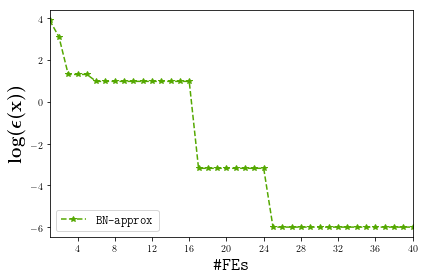

In [85]:
# compute regret trace
run = 1
dim = 2
alg_variant = 'BN-approx'
actual_fevals = len(bn_approx.pts)
fevals = actual_fevals
best_regret = np.inf
regret_trace = []
for xs in bn_approx.pts[:fevals]:
    best_regret = min(best_regret, problem.ne_regret(xs, is_unit=True)) # is_unit denote that xs is in the space[0,1]
    regret_trace.append(best_regret)


stats = {
    'fevals': fevals,
    'run': run,
    'alg': alg_variant,
    'dim': dim,
    'actual_fevals': actual_fevals,
    'regret_trace': regret_trace
}
print(stats)
plot_regret_trace([stats], is_file=False)

In [86]:
# get a suggested NE (experimental):
best_ne_br = bn_approx.suggest_approx_ne(best_crit='br')
best_ne_abr =  bn_approx.suggest_approx_ne(best_crit='abr')
best_ne_std = bn_approx.suggest_approx_ne(best_crit='std')

In [87]:
pts = [best_ne_br, best_ne_abr, best_ne_std]
names = ['br', 'abr', 'std']
print("NE: {}, Approx Regret: {}".format(
    problem.get_x_ne(), 
    bn_approx.approx_max_regret(problem.get_x_ne())
    ))
print("After {} function evaluations".format(problem.get_num_evals()))

for pt, name in zip(pts, names):
    print("=" * 20)
    print("{}-best pt: {}, Actual regret: {}".format(name, pt, problem.ne_regret(pt, is_unit=True)))
    print("{}-best pt: {}, Approx regret: {}".format(name, pt, bn_approx.approx_max_regret(pt)))
    print("player 1 - {}-best pt regret: {}, NE regret : {}".format(
        name,
        bn_approx.approx_regret(pt, 0),
        bn_approx.approx_regret(problem.get_x_ne(), 0)
    ))
    print("player 2 - {}-best pt regret: {}, NE regret : {}".format(
        name,
        bn_approx.approx_regret(pt, 1),
        bn_approx.approx_regret(problem.get_x_ne(), 1)
    ))

NE: [0.08093333 1.        ], Approx Regret: 0.657811093349
After 8400 function evaluations
br-best pt: [0.07989402 0.9999767 ], Actual regret: 0.00225090719826
br-best pt: [0.07989402 0.9999767 ], Approx regret: 0.792744680176
player 1 - br-best pt regret: 0.619274110583, NE regret : 0.789657009166
player 2 - br-best pt regret: 0.341280639112, NE regret : 0.382026291043
abr-best pt: [0.10015212 0.98214589], Actual regret: 0.504079356071
abr-best pt: [0.10015212 0.98214589], Approx regret: 0.581367932208
player 1 - abr-best pt regret: 0.788708989305, NE regret : 0.520891567672
player 2 - abr-best pt regret: 0.383620004006, NE regret : 0.362086232509
std-best pt: [0.10487802 0.98701749], Actual regret: 0.990162255623
std-best pt: [0.10487802 0.98701749], Approx regret: 0.682690816955
player 1 - std-best pt regret: 0.582793378383, NE regret : 0.723559088249
player 2 - std-best pt regret: 0.446961078489, NE regret : 0.407589703503


In [88]:
closest_sampled_pt = bn_approx.pts[np.argmin(np.sum((bn_approx.pts - problem.get_x_ne())**2, axis=1)),:]
print("BN-closest (to actual NE) sampled pt: {}, Actual regret: {}".format(closest_sampled_pt, problem.ne_regret(closest_sampled_pt, is_unit=True)))

BN-closest (to actual NE) sampled pt: [0.07989402 0.9999767 ], Actual regret: 0.00243497623214
